# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.


In [2]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.3.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [6]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [7]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [8]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

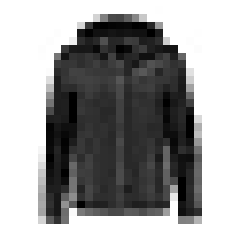

In [9]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [10]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [11]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [12]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [13]:
X_valid.shape

(5000, 28, 28)

In [14]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

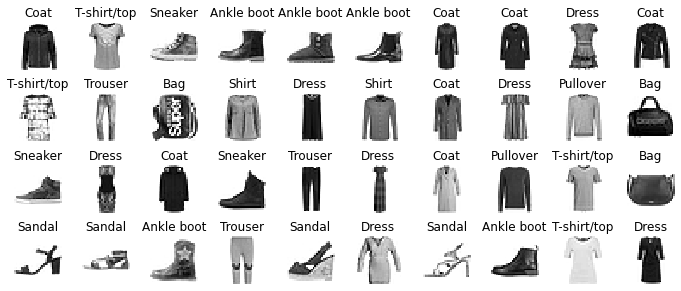

In [15]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [17]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [30]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [31]:
model.layers

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [33]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [34]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [35]:
model.get_layer(hidden1.name) is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()

In [36]:
weights

array([[ 0.06547968,  0.03868557, -0.01879838, ...,  0.05402012,
         0.04590537, -0.0433596 ],
       [ 0.02372927, -0.02134334,  0.00287034, ...,  0.0074392 ,
         0.06592765,  0.06202514],
       [ 0.03533184,  0.05493861, -0.05241273, ..., -0.03427001,
         0.04321834, -0.05676491],
       ...,
       [-0.01602191, -0.05090193,  0.07185225, ...,  0.07203257,
        -0.04568732, -0.06599092],
       [-0.00118439, -0.06808567,  0.03475713, ..., -0.06801458,
        -0.00740949,  0.01688768],
       [ 0.02900542,  0.07017787,  0.03059363, ...,  0.06439508,
         0.05202529,  0.00010627]], dtype=float32)

In [37]:
weights.shape

(784, 300)

In [38]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [39]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [40]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [41]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7215 - accuracy: 0.7639 - val_loss: 0.5036 - val_accuracy: 0.8304
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4877 - accuracy: 0.8299 - val_loss: 0.4501 - val_accuracy: 0.8502
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4414 - accuracy: 0.8468 - val_loss: 0.4136 - val_accuracy: 0.8648
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4152 - accuracy: 0.8539 - val_loss: 0.4049 - val_accuracy: 0.8582
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3965 - accuracy: 0.8611 - val_loss: 0.3981 - val_accuracy: 0.8604
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3797 - accuracy: 0.8668 - val_loss: 0.3677 - val_accuracy: 0.8754
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3667 - accuracy: 0.8717 - val_loss: 0.3725 - val_accuracy:

In [52]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [53]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

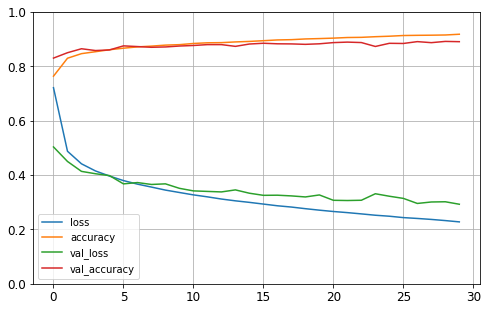

In [55]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3174 - accuracy: 0.8878


[0.3174174129962921, 0.8877999782562256]

In [57]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [58]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1])

In [59]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [60]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

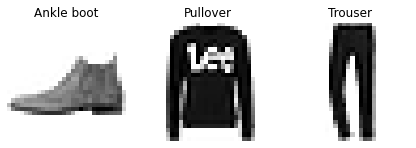

In [61]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

#### 1) Plot Learning curves when using different optimizers

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0555 - accuracy: 0.9841 - val_loss: 0.3458 - val_accuracy: 0.8996
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9860 - val_loss: 0.3452 - val_accuracy: 0.9000
Epoch 3/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0502 - accuracy: 0.9863 - val_loss: 0.3491 - val_accuracy: 0.9010
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0495 - accuracy: 0.9870 - val_loss: 0.3474 - val_accuracy: 0.8996
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0486 - accuracy: 0.9873 - val_loss: 0.3458 - val_accuracy: 0.9008
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0482 - accuracy: 0.9873 - val_loss: 0.3491 - val_accuracy: 0.8994
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0474 - accuracy: 0.9877 - val_loss: 0.3463 - val_accuracy:

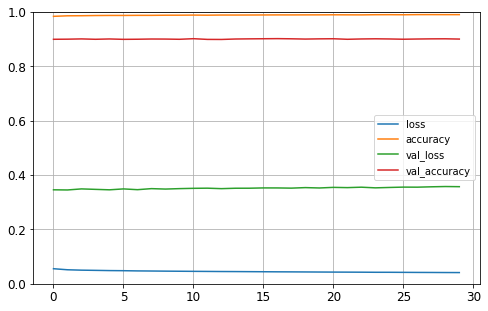

In [64]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adagrad",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### 2) Plot Learning curves when using different batch size

Epoch 1/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0846 - accuracy: 0.9694 - val_loss: 0.3716 - val_accuracy: 0.8988
Epoch 2/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0841 - accuracy: 0.9699 - val_loss: 0.3867 - val_accuracy: 0.8934
Epoch 3/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0794 - accuracy: 0.9714 - val_loss: 0.3970 - val_accuracy: 0.8916
Epoch 4/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0802 - accuracy: 0.9714 - val_loss: 0.3840 - val_accuracy: 0.8962
Epoch 5/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0779 - accuracy: 0.9723 - val_loss: 0.3924 - val_accuracy: 0.8920
Epoch 6/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0774 - accuracy: 0.9727 - val_loss: 0.3840 - val_accuracy: 0.8958
Epoch 7/30
2500/2500 [==============================] - 6s 2ms/step - loss: 0.0734 - accuracy: 0.9740 - val_loss: 0.3742 - val_accuracy:

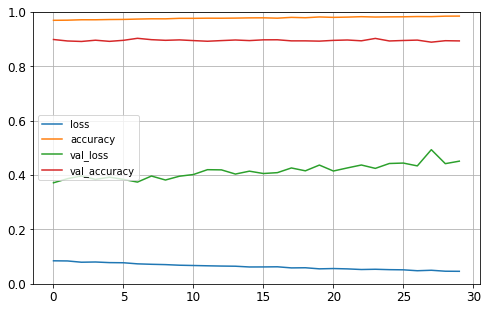

In [65]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=22, epochs=30,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### 3) Plot Learning curves when using different number of epochs

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=15,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3842 - accuracy: 0.1232 - val_loss: 2.2788 - val_accuracy: 0.1174
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.2912 - accuracy: 0.1057 - val_loss: 2.2998 - val_accuracy: 0.1022
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3005 - accuracy: 0.1021 - val_loss: 2.2998 - val_accuracy: 0.1022
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3008 - accuracy: 0.1003 - val_loss: 2.2998 - val_accuracy: 0.1022
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3009 - accuracy: 0.0992 - val_loss: 2.2998 - val_accuracy: 0.1022
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3008 - accuracy: 0.1021 - val_loss: 2.2998 - val_accuracy: 0.1022
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 2.3009 - accuracy: 0.0996 - val_loss: 2.2998 - val_accuracy:

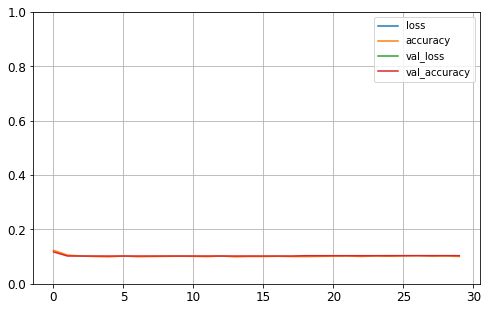

In [71]:
model.add(tf.keras.layers.Dropout(.3))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

#### 5) Use Batch Normalisation



In [72]:
from keras.layers import BatchNormalization
model.add(BatchNormalization())